<div class="alert alert-block alert-warning">
<h1><center><b>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</b></h1></center>
<h1><center><b>Final Project</b></h1></center>
</div>

<div class="alert alert-block alert-info">
<b>Group_ID: 9<b>
<br></br>
<b>Group Members:</b>  

1. Arihant B00917961 
2. Mudra B00932103
3. Abhinav Acharya B00929073
4. Dhruv B00891974
</div>


<div class="alert alert-block alert-warning">

<h1><center><b>1. Dataset Information </b></h1>

<div class="alert alert-block alert-info">
<b>Dataset Name:</b>  tracks_features.csv

<b>Link to the Dataset:</b> https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs

<b>Dataset Description:</b> 
The dataset "Spotify 12M Songs" available on Kaggle contains a comprehensive collection of music-related information. It encompasses a wide array of data associated with approximately 12 million songs available on the Spotify platform. The dataset provides extensive details regarding various attributes and features of these songs, such as song and artist names, popularity metrics, audio features like danceability, energy, valence, tempo, and duration, as well as categorization attributes like genre, subgenre, and release date. This rich dataset is a valuable resource for exploring and analyzing music-related trends, patterns, and characteristics across a vast range of songs available on Spotify.
</div>

<div class="alert alert-block alert-warning">

<h1><center><b>2. Task Information</b></h1>


<div class="alert alert-block alert-info">
<b> Task 2 Goal:</b>  Song Clustering & Exploration

<b>Task 2 Description:</b> The primary goal is to analyze and categorize songs based on their audio features available in the extensive "Spotify 12M Songs" dataset from Kaggle. This task involves clustering songs using machine learning techniques, specifically the K-means algorithm, to group similar songs together based on their shared audio attributes such as danceability, energy, valence, tempo, and other musical characteristics.

The importance lies in discovering inherent patterns and similarities among songs, allowing for the natural categorization of music based on their audio features. This process aids in understanding how songs can be grouped according to their musical traits, potentially assisting in music recommendation systems or providing insights into music trends and preferences.

The dataset contains a wide array of features for approximately 12 million songs available on Spotify. These features include numerous attributes that describe the musical content of each song, providing a rich set of information to perform clustering analysis.

The K-means clustering algorithm is selected for this task due to its ability to partition data into distinct clusters based on feature similarities. It is being used here to create clusters of songs where each cluster represents songs that share similar musical characteristics. This unsupervised learning technique is chosen because it does not require labeled data and can uncover natural groupings within the song features.

The goal is to analyze and categorize songs into clusters, enabling a deeper understanding of the relationships and common traits shared among songs based on their audio features. Ultimately, this aids in exploring music patterns, potentially improving music recommendation systems and providing insights into musical trends and characteristics.
</div>

<div class="alert alert-block alert-warning">

<h1><center><b>3. Task Implementation: Coding</b></h1>

<div class="alert alert-block alert-warning">

<h3><center><b>Song Clustering & Exploration</b></h3>

<div class="alert alert-block alert-info">
<b>Importing Libraries</b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

<div class="alert alert-block alert-info">

<h5><b>3.1 EDA</b></h5>

</div>

<div class="alert alert-block alert-info">
Loading the dataset</div>

In [4]:
tracks_features_dataset_path = r'tracks_features.csv'

tracks_dataset = pd.read_csv(tracks_features_dataset_path)
display(tracks_dataset.head())
display(tracks_dataset.describe())
display(tracks_dataset.isna().sum())

id                   name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify  The Battle Of Los Angeles   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio  The Battle Of Los Angeles   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb  The Battle Of Los Angeles   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check  The Battle Of Los Angeles   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1     False   
1  ['2d0hyoQ5ynDBnkvAbJKORj']             2            1      True   
2  ['2d0hyoQ5ynDBnkvAbJKORj']             3            1     False   
3  ['2d0hyoQ5ynDBnkvAbJKORj']             4            1      True   
4  ['2d0hyoQ5ynDBnkvAbJKORj']             5            1     False   

   danceability  ...  speechiness  acousticness  instrumentalness  liveness  \
0         0.470  ...       0.0727       0.02610          0.000011    0.3560   
1         0.599  ...       0.1880       0.01290          0.000071    0.1550   
2         0.315  ...       0.4830       0.02340          0.000002    0.1220   
3         0.440  ...       0.2370       0.16300          0.000004    0.1210   
4         0.426  ...       0.0701       0.00162          0.105000    0.0789   

   valence    tempo  duration_ms  time_signature  year  release_date  
0    0.503  117.906       210133             4.0  1999    1999-11-02  
1    0.489  103.680       206200             4.0  1999    1999-11-02  
2    0.370  149.749       298893             4.0  1999    1999-11-02  
3    0.574   96.752       213640             4.0  1999    1999-11-02  
4    0.539  127.059       205600             4.0  1999    1999-11-02  

[5 rows x 24 columns]

track_number   disc_number  danceability        energy           key  \
count  1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06   
mean   7.656352e+00  1.055906e+00  4.930565e-01  5.095363e-01  5.194151e+00   
std    5.994977e+00  2.953752e-01  1.896694e-01  2.946839e-01  3.536731e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  1.000000e+00  3.560000e-01  2.520000e-01  2.000000e+00   
50%    7.000000e+00  1.000000e+00  5.010000e-01  5.240000e-01  5.000000e+00   
75%    1.000000e+01  1.000000e+00  6.330000e-01  7.660000e-01  8.000000e+00   
max    5.000000e+01  1.300000e+01  1.000000e+00  1.000000e+00  1.100000e+01   

           loudness          mode   speechiness  acousticness  \
count  1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06   
mean  -1.180870e+01  6.714595e-01  8.438219e-02  4.467511e-01   
std    6.982132e+00  4.696827e-01  1.159914e-01  3.852014e-01   
min   -6.000000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%   -1.525400e+01  0.000000e+00  3.510000e-02  3.760000e-02   
50%   -9.791000e+00  1.000000e+00  4.460000e-02  3.890000e-01   
75%   -6.717000e+00  1.000000e+00  7.230000e-02  8.610000e-01   
max    7.234000e+00  1.000000e+00  9.690000e-01  9.960000e-01   

       instrumentalness      liveness       valence         tempo  \
count      1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06   
mean       2.828605e-01  2.015994e-01  4.279866e-01  1.176344e+02   
std        3.762844e-01  1.804591e-01  2.704846e-01  3.093705e+01   
min        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        7.600000e-06  9.680000e-02  1.910000e-01  9.405400e+01   
50%        8.080000e-03  1.250000e-01  4.030000e-01  1.167260e+02   
75%        7.190000e-01  2.450000e-01  6.440000e-01  1.370460e+02   
max        1.000000e+00  1.000000e+00  1.000000e+00  2.489340e+02   

        duration_ms  time_signature          year  
count  1.204025e+06    1.204025e+06  1.204025e+06  
mean   2.488399e+05    3.832494e+00  2.007328e+03  
std    1.622104e+05    5.611826e-01  1.210117e+01  
min    1.000000e+03    0.000000e+00  0.000000e+00  
25%    1.740900e+05    4.000000e+00  2.002000e+03  
50%    2.243390e+05    4.000000e+00  2.009000e+03  
75%    2.858400e+05    4.000000e+00  2.015000e+03  
max    6.061090e+06    5.000000e+00  2.020000e+03

id                   0
name                 3
album               11
album_id             0
artists              0
artist_ids           0
track_number         0
disc_number          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
year                 0
release_date         0
dtype: int64


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is about Exploratory Data Analysis (EDA) on the dataset. It displays first few data points, its length, statistical summary, count of missing values per column, and a tabulation displaying column names, their data types, and the number of unique values within each column.
</div>

In [5]:
tracks_dataset.dropna(inplace=True)
display(tracks_dataset.isna().sum())
tracks_dataset = tracks_dataset.sample(n=25000, random_state=42)

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
year                0
release_date        0
dtype: int64


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Removing the missing values in the dataset.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.2 Pre-processing</b></h5>

</div>

<div class="alert alert-block alert-info">

Feature selection & encoding

</div>

In [6]:
selected_features = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year']
X = tracks_dataset[selected_features]
# Normalize the values of each column
X = (X - X.mean()) / X.std()


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Standardize the chosen features by normalizing their values, making their scales more consistent for analysis by subtracting the mean and dividing by the standard deviation.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.3 Model Development and Training</b></h5>

</div>

<div class="alert alert-block alert-info">
Applying K-means to cluster songs based on their audio features

In [7]:
# Initialize an empty list to store the sum of squared distances for each number of clusters
inertia = []
silhouette = []

# Fit the KMeans model to the data with a range of different numbers of clusters
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, clusters))


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- <b>K-Means Clustering:</b> KMeans clustering with varying numbers of clusters (from 2 to 14) on a dataset (X) containing specific music features. For each cluster count, it calculates and stores the sum of squared distances within clusters (inertia) and the silhouette score, which measures how similar an object is to its own cluster compared to other clusters. This helps in finding the optimal number of clusters for grouping the music data effectively.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.4 Evaluation</b></h5>

</div>

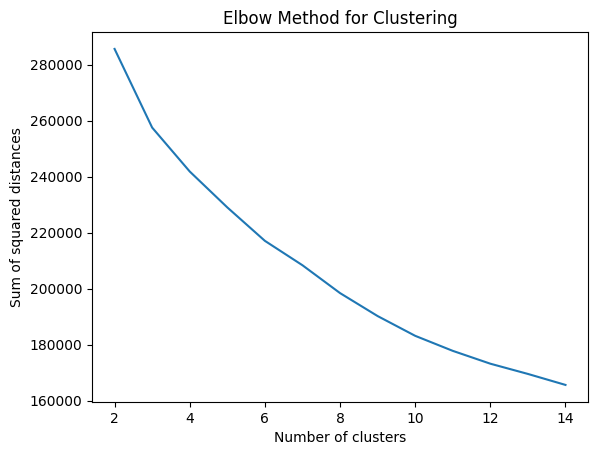

In [8]:
# Plot the sum squared distances for each number of clusters for elbow method

plt.plot(range(2, 15), inertia)
plt.title('Elbow Method for Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()



<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We used the elbow method, as described in the previous step, to determine that the appropriate number of clusters is roughly 8. However since the elbow is hard to identify, other numbers can be tested for better results
</div>

In [9]:
# Initialize the KMeans model with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=1, n_init=10)

# Fit the model to the data
kmeans.fit(X) 
clusters = kmeans.predict(X)

# Calculate the silhouette score for the generated clusters
silhouette_score(X, clusters)

0.1399194134046164


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- KMeans clustering algorithm to group data into 8 clusters based on certain features. It calculates the silhouette score, a measure of how well-defined the clusters are and how distinct they are from each other. The goal is to assess the quality of the clustering solution for the given data.

A silhouette score around 0 suggests that the clusters lack clear boundaries, indicating less similarity among data points within each cluster. This situation might arise if the chosen features aren't detailed enough to effectively group the data.

For instance, in music classification, certain songs might fall into multiple genres or subgenres. Consequently, these labels may not precisely capture each song's essence as genres can be flexible and sometimes fail to portray a song's unique characteristics accurately.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.5 Analysis</b></h5>

</div>

<div class="alert alert-block alert-info">

Vizualizing the clusters obtained after applying K-means

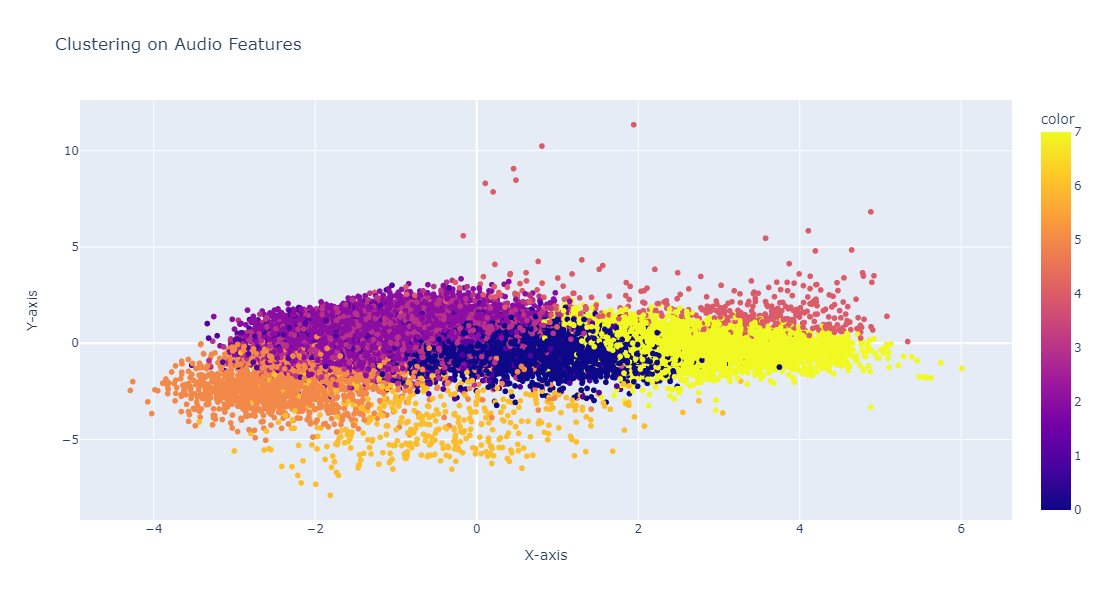

In [10]:
pca = PCA(n_components=2)  # Initialize a PCA model with 2 components
df_2d = pca.fit_transform(X)  # Reduce the data to two dimensions using the PCA model

# Plot the data points on a scatter plot
# Coloring the data points according to their cluster assignment
fig = px.scatter(
    tracks_dataset,
    x=df_2d[:, 0],
    y=df_2d[:, 1],
    color=clusters,
    hover_data={'name': True},
    title='Clustering on Audio Features'
)
fig.update_layout(
    width=800,  # Set width in pixels
    height=600,
    xaxis_title='X-axis', 
    yaxis_title='Y-axis'
)

fig.show()


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- <b>Song Clustering:</b> Clustering songs based on their audio features using the K-means algorithm. This algorithm groups songs together based on similarities in their attributes such as danceability, energy, valence, etc.
- <b>Visualization:</b> The visualization represents the clustered songs in a two-dimensional space (x and y axes) generated by PCA (Principal component analysis). Each song is plotted as a point, where the x and y coordinates are derived from the PCA algorithm. The color of each point corresponds to its assigned cluster label.
- <b>Interactive Exploration:</b> Users can explore the songs within each cluster by hovering over the points. Additional information such as the track name ('trackname') is displayed when hovering over a specific point.

The scatter plot provides an overview of how songs are grouped together based on their audio features. Each point represents a song, and the clustering helps to identify similar songs that share common audio characteristics. The visualization aims to assist users in exploring and understanding patterns within the song dataset, enabling a visual analysis of song clusters.
</div>

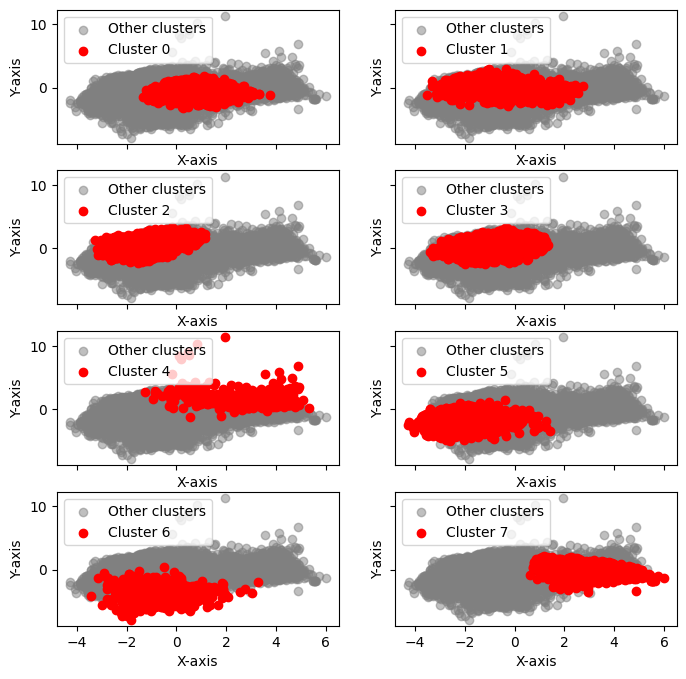

In [11]:
# Get the unique cluster assignments
unique_clusters = np.unique(clusters)

# Create a grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
axs = axs.flatten()

for i, cluster in enumerate(unique_clusters):
    df_cluster = df_2d[clusters == cluster]
    # Select the data points belonging to other clusters
    df_other_clusters = df_2d[clusters != cluster]
    
    # Plot the data points belonging to other clusters in gray
    axs[i].scatter(df_other_clusters[:, 0], df_other_clusters[:, 1], c='gray', label='Other clusters', alpha=0.5)
    
    # Plot the data points belonging to the current cluster with a different color
    axs[i].scatter(df_cluster[:, 0], df_cluster[:, 1], c='red', label='Cluster {}'.format(cluster))
    
    axs[i].set_xlabel('X-axis')
    axs[i].set_ylabel('Y-axis')
    axs[i].legend()

plt.show()


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

    
Each plot represents a cluster, showing the points belonging to that specific cluster in red and the points from other clusters in gray. The aim is to visually represent how the data points group together in different clusters based on their characteristics along the X and Y axes.
</div>

<div class="alert alert-block alert-info">
<b>References:</b>

1. Halilovic, I. (2021, July 30). Markdown for Jupyter notebooks cheatsheet - Inge Halilovic - Medium. Medium. https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
2. Scribbr. (2021, July 30). Free APA citation Generator | with Chrome Extension - Scribbr. https://www.scribbr.com/citation/generator/apa/
3. Zach. (2023). How to create a distribution plot in Matplotlib. Statology. https://www.statology.org/matplotlib-distribution-plot/
4. seaborn.displot — seaborn 0.12.2 documentation. (n.d.). https://seaborn.pydata.org/generated/seaborn.displot.html
5. Lau, C. H. (2021, December 7). 5 steps of a Data Science Project Lifecycle - towards Data Science. Medium. https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492
6. Are hit songs becoming less musically diverse? (n.d.). The Pudding. https://pudding.cool/2018/05/similarity/
7. Nasreldin, M. (2018, July 2). Song Popularity Predictor - towards Data science. Medium. https://towardsdatascience.com/song-popularity-predictor-1ef69735e380
8. Seaborn.Heatmap — seaborn 0.13.0 documentation. (n.d.). Pydata.org. Retrieved October 3, 2023. https://seaborn.pydata.org/generated/seaborn.heatmap.html
9. IBM documentation. (2021, April 8). Ibm.com. https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooksmarkdown-jupyter-cheatsheet
10. Spotify Tracks DB. (2019, July 23). Kaggle. https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db#SpotifyFeatures.csv
</div>